In [131]:
import numpy as np
import sys
import os
from astropy.table import Table
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb
from astropy.coordinates import SkyCoord
from astropy import units as u
import scipy.stats as stats
from matplotlib.ticker import MaxNLocator

mainpath = '/Users/jorgetil/Astro/HITS'
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 7)
sb.set(style="ticks", color_codes=True, context="poster", font_scale=1.2)
sb.set_style({"xtick.direction": "in","ytick.direction": "in"})

In [3]:
def rms(x):
    return np.sqrt(x.dot(x)/x.size)

def MAD(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))

def mask_difference(x, y, n=3.):
    diff = x - y
    diff_MAD = MAD(diff)
    mask = (diff > np.median(diff) - n * diff_MAD) & (diff < np.median(diff) + n * diff_MAD)
    return mask

### HiTS data

In [181]:
field = 'Blind14A_04'
#field = 'Blind15A_25'
#field = 'Blind13A_18'
b = 'g'

In [182]:
HiTS_path = '%s/tables/%s_phot_n3_table.csv' % (mainpath, field)
#HiTS_data = Table.read(HiTS_path)
#HiTS_data = HiTS_data.to_pandas()
HiTS_data = pd.read_csv(HiTS_path, compression='gzip')

In [183]:
#HiTS_data.drop('Unnamed: 0', axis=1, inplace=True)
print 'Shape of HiTS DF', HiTS_data.shape
#mask = 'gN > 17 and rN > 0 and iN > 0 and gFlags < 1 and gEllipticity < .4 and gFluxRadius < 3.5 and gFWHM < 10 and rFlags < 1 and iFlags < 1 and rFWHM < 10 and iFWHM < 10 and gMedianKronMag > 0'
mask = 'gN > 15 and gFlags < 1 and gEllipticity < .4 and gFluxRadius < 3.5 and gFWHM < 10 and gMedianKronMag > 0'
#mask = 'uN > 15 and uFlags < 1 and uEllipticity < .4 and uFluxRadius < 3.5 and uFWHM < 10 and uMedianKronMag > 0'
HiTS_data_good_quality = HiTS_data.query(mask)
print 'Shape of HiTS good quility DF', HiTS_data_good_quality.shape
HiTS_data_good_quality.describe()

Shape of HiTS DF (98390, 52)
Shape of HiTS good quility DF (17051, 52)


,Unnamed: 0,X,Y,raMedian,decMedian,raMedianStd,decMedianStd,gN,gFluxRadius,gFWHM,...,gAp4FluxStd,gMedianAp4Mag,gMedianAp4MagStd,gMedianAp4MagErr,gAp5Flux,gAp5FluxErr,gAp5FluxStd,gMedianAp5Mag,gMedianAp5MagStd,gMedianAp5MagErr
count,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000,17051.0000,...,17051.000000,17051.000000,17051.000000,17051.000000,1.705100e+04,17051.000000,17051.000000,17051.000000,17051.000000,17051.000000
mean,809.383966,1031.001908,2054.595833,150.114163,2.206357,0.000020,0.000017,18.852325,3.012641,6.8867,...,880.460486,16.224100,-5.203135,0.784199,2.873516e+04,1767.169740,1272.757878,9.874136,-11.378624,1.055433
std,429.524471,537.435232,1123.114911,0.502260,0.473423,0.000010,0.000010,1.492742,0.224194,1.2078,...,2432.588835,74.387563,72.797846,1.903467,1.095298e+05,3539.204915,3527.266103,109.090282,106.778828,2.829174
min,37.000000,54.037180,49.578927,149.044820,1.234055,0.000002,0.000001,16.000000,2.249500,4.4600,...,93.988689,-999.000000,-999.000000,0.003068,4.518542e+02,773.529176,121.446403,-999.000000,-999.000000,0.002855
25%,442.000000,566.386469,1091.066329,149.716636,1.826029,0.000012,0.000008,18.000000,2.863000,5.7525,...,164.738614,20.956440,0.045834,0.141471,1.162541e+03,918.567784,216.461468,20.907217,0.054345,0.180173
50%,791.000000,1023.516488,2056.110644,150.115127,2.225682,0.000020,0.000016,20.000000,2.980000,6.8700,...,196.267853,22.360021,0.125327,0.477473,1.878042e+03,968.412240,256.336686,22.344613,0.157874,0.605837
75%,1156.500000,1501.489797,3025.041562,150.512693,2.585453,0.000026,0.000023,20.000000,3.164500,7.7800,...,240.572622,22.907698,0.187310,0.742340,6.581334e+03,1024.465739,315.717233,22.896474,0.235250,0.941186
max,1924.000000,2035.167482,4062.756664,151.194491,3.183014,0.000077,0.000089,20.000000,3.499500,9.9950,...,17674.476333,23.841315,1.235387,28.067836,1.579717e+06,26930.750152,23527.068463,23.952845,1.750621,51.945150


In [184]:
HiTS_data.head()

,Unnamed: 0,internalID,ID,X,Y,raMedian,decMedian,raMedianStd,decMedianStd,gN,...,gAp4FluxStd,gMedianAp4Mag,gMedianAp4MagStd,gMedianAp4MagErr,gAp5Flux,gAp5FluxErr,gAp5FluxStd,gMedianAp5Mag,gMedianAp5MagStd,gMedianAp5MagErr
0,0,Blind14A_04_N1_-002_4055,HiTS095719+021210,-2.517392,4055.165050,149.333168,2.202841,0.000009,0.000026,4,...,135.807704,22.275837,0.196305,0.453898,2449.7630,1153.282343,181.415748,22.109384,0.208697,0.531702
1,1,Blind14A_04_N1_-006_1248,HiTS095630+021211,-6.311221,1248.452879,149.128540,2.203133,0.000033,0.000070,4,...,135.796342,20.883471,0.189926,0.135526,7711.1140,1153.817697,181.416532,20.866505,0.216758,0.172028
2,2,Blind14A_04_N1_-010_3757,HiTS095714+021212,-10.310769,3757.267362,149.311424,2.203394,0.000048,0.000013,3,...,78.681243,21.809824,0.024062,0.307787,3756.0700,1208.970442,103.637286,21.638114,0.024684,0.349583
3,3,Blind14A_04_N1_-012_3197,HiTS095704+021212,-12.751464,3197.749616,149.270610,2.203561,0.000019,0.000120,4,...,135.782915,22.547168,0.133249,0.608528,1785.6765,1153.178723,181.390617,22.478660,0.255701,0.715872
4,4,Blind14A_04_N1_-014_3540,HiTS095710+021213,-14.075362,3540.100818,149.295580,2.203662,0.000022,0.000108,3,...,78.680088,22.287730,0.061097,0.462384,2395.7880,1208.846131,103.647060,22.150892,0.024034,0.535074


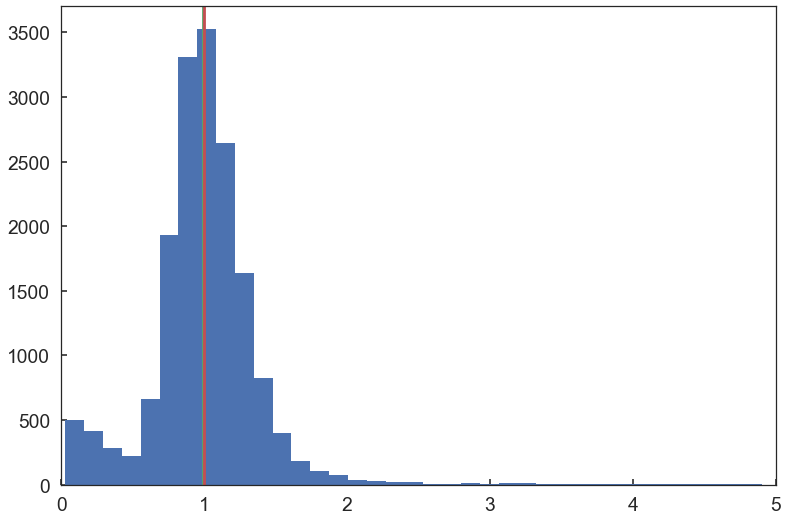

0.994591394392


In [185]:
plt.hist(HiTS_data_good_quality['%sMedianKronMagStd' % (b)]/HiTS_data_good_quality['%sMedianKronMagErr' % (b)],bins=2000)
plt.axvline(np.median(HiTS_data_good_quality['%sMedianKronMagStd' % (b)]/HiTS_data_good_quality['%sMedianKronMagErr' % (b)]),c='g')
plt.axvline(1,c='r')
plt.xlim(0,5)
plt.show()
print np.median(HiTS_data_good_quality['%sMedianKronMagStd' % (b)]/HiTS_data_good_quality['%sMedianKronMagErr' % (b)])

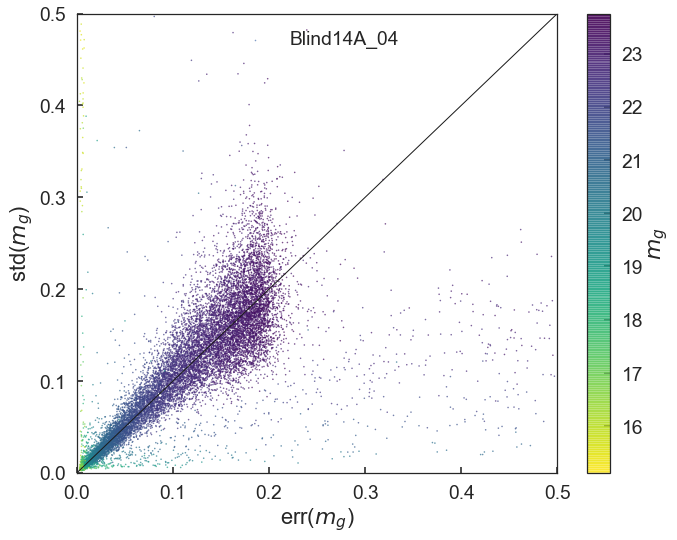

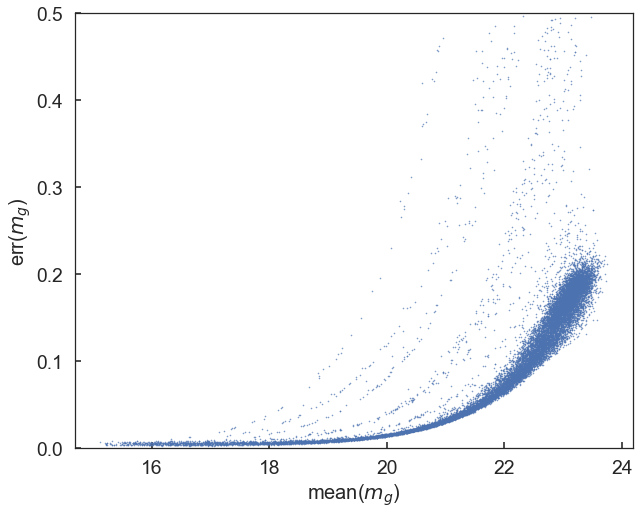

In [186]:
for b in ['g','r','i']:
#for b in ['u']:
    plt.figure(figsize=(10,8))
    plt.scatter(HiTS_data_good_quality['%sMedianKronMagErr' % (b)], 
                HiTS_data_good_quality['%sMedianKronMagStd' % (b)], 
                c=HiTS_data_good_quality['%sMedianKronMag' % (b)],
                marker='.', s=10, lw=0, alpha=.7, cmap='viridis_r', label=field)
    #sb.kdeplot(HiTS_data_good_quality['%sMedianKronMagErr' % (b)], 
    #           HiTS_data_good_quality['%sMedianKronMagStd' % (b)], 
    #           axis=ax, bw=[.001,.05], n_levels=5, linewidths=1,
    #           kernel='triw')
    plt.colorbar().set_label('$m_{%s}$' % (b), size=22)
    plt.plot([0,1], [0,1], 'k', lw=1)
    #ax.plot(np.linspace(0,.5), np.linspace(0,.5)*1.25, 'k', lw=1)
    plt.xlabel(r'err($m_{%s}$)' % (b), size=22)
    plt.ylabel(r'std($m_{%s}$)' % (b), size=22)
    plt.xlim(0,.5)
    plt.ylim(0,.5)
    plt.legend(loc='upper center')
    
    plt.tight_layout()
    plt.savefig('%s/figures/err_std_%s_%s.pdf' % (mainpath, field, b), format='pdf', dpi=600,
                bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.scatter(HiTS_data_good_quality['%sMedianKronMag' % (b)], 
                HiTS_data_good_quality['%sMedianKronMagErr' % (b)], 
                marker='.', s=10, lw=0, alpha=.7, cmap='winter')
    plt.xlabel(r'mean($m_{%s}$)' % (b), size=20)
    plt.ylabel(r'err($m_{%s}$)' % (b), size=20)
    plt.ylim(0,.5)
    plt.show()
    break

In [187]:
print HiTS_data_good_quality.query('gMedianKronMagStd > 0.028 and gMedianKronMagStd < 0.032').gMedianKronMag.median()
print HiTS_data_good_quality.query('gMedianKronMagErr > 0.028 and gMedianKronMagErr < 0.032').gMedianKronMag.median()

20.9592195009
20.9279049981


In [188]:
print HiTS_data_good_quality.columns.tolist()

['Unnamed: 0', 'internalID', 'ID', 'X', 'Y', 'raMedian', 'decMedian', 'raMedianStd', 'decMedianStd', 'gN', 'gFluxRadius', 'gFWHM', 'gEllipticity', 'gKronRadius', 'gFlags', 'gClassStar', 'gKronFlux', 'gKronFluxErr', 'gKronFluxStd', 'gMedianKronMag', 'gMedianKronMagStd', 'gMedianKronMagErr', 'gAp1Flux', 'gAp1FluxErr', 'gAp1FluxStd', 'gMedianAp1Mag', 'gMedianAp1MagStd', 'gMedianAp1MagErr', 'gAp2Flux', 'gAp2FluxErr', 'gAp2FluxStd', 'gMedianAp2Mag', 'gMedianAp2MagStd', 'gMedianAp2MagErr', 'gAp3Flux', 'gAp3FluxErr', 'gAp3FluxStd', 'gMedianAp3Mag', 'gMedianAp3MagStd', 'gMedianAp3MagErr', 'gAp4Flux', 'gAp4FluxErr', 'gAp4FluxStd', 'gMedianAp4Mag', 'gMedianAp4MagStd', 'gMedianAp4MagErr', 'gAp5Flux', 'gAp5FluxErr', 'gAp5FluxStd', 'gMedianAp5Mag', 'gMedianAp5MagStd', 'gMedianAp5MagErr']


In [189]:
num_obs = [x[0] for x in HiTS_data_good_quality.columns.values if 'N' in x]
print num_obs

['g']


### PanSTARRS data

In [191]:
PS1_path = '%s/PanSTARRS/%s_PS1.vot' % (mainpath, field)
print PS1_path
PS1_data = Table.read(PS1_path)
PS1_data = PS1_data.to_pandas()

/Users/jorgetil/Astro/HITS/PanSTARRS/Blind14A_04_PS1.vot


In [192]:
print 'Shape of PS1 DF', PS1_data.shape
PS1_data_good_g = PS1_data.query('qualityFlag < 53')
print 'Shape of PS1 g detections DF', PS1_data_good_g.shape
PS1_data_good_g.describe()

Shape of PS1 DF (248572, 64)
Shape of PS1 g detections DF (176921, 64)


,raMean,decMean,raMeanErr,decMeanErr,nDetections,randomID,projectionID,skyCellID,objInfoFlag,qualityFlag,...,zFlags,yQfPerfect,yMeanPSFMag,yMeanPSFMagErr,yMeanKronMag,yMeanKronMagErr,yMeanApMag,yMeanApMagErr,yFlags,Ang_Sep____
count,176921.000000,176921.000000,176921.000000,176921.000000,176921.000000,176921.000000,176921.000000,176921.000000,1.769210e+05,176921.000000,...,1.769210e+05,176921.000000,176921.000000,176921.000000,176921.000000,176921.000000,176921.000000,176921.000000,1.769210e+05,176921.000000
mean,150.105258,2.231246,11.136467,2.432750,18.184975,0.498746,1359.555898,55.586171,3.737008e+08,44.514880,...,1.096358e+06,-761.761902,-757.346252,-762.412903,-796.338318,-800.164062,-759.373840,-763.932129,4.723105e+05,7.990051
std,0.504772,0.492321,215.390167,100.386925,22.673569,0.288784,0.496867,13.244626,7.509190e+07,8.958054,...,4.042822e+06,425.380005,433.284271,424.736786,406.583435,398.907898,432.017242,423.798950,2.660711e+06,2.818461
min,148.993975,1.103131,-999.000000,-999.000000,3.000000,0.000118,1359.000000,20.000000,1.357906e+08,16.000000,...,0.000000e+00,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000e+00,0.014000
25%,149.708042,1.851019,0.026000,0.024000,3.000000,0.249502,1359.000000,48.000000,3.020636e+08,36.000000,...,0.000000e+00,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000e+00,5.999000
50%,150.100812,2.240722,0.059000,0.056000,6.000000,0.497673,1360.000000,57.000000,4.362813e+08,52.000000,...,1.147200e+05,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,1.641600e+04,8.443000
75%,150.492792,2.615828,0.098000,0.095000,23.000000,0.747338,1360.000000,68.000000,4.365271e+08,52.000000,...,1.150000e+05,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,1.147200e+05,10.384000
max,151.257925,3.310672,32289.800781,8050.180176,112.000000,0.999975,1360.000000,89.000000,4.365277e+08,52.000000,...,1.689606e+07,1.000000,24.094999,0.497000,22.361000,0.333000,26.438999,10.658000,1.689606e+07,12.000000


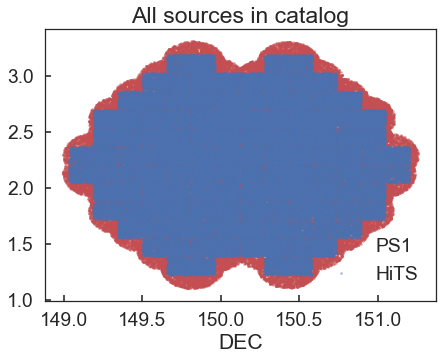

In [193]:
plt.figure(figsize=(7,5))
plt.plot(PS1_data.raMean, PS1_data.decMean,'r.', ms=5, label='PS1', alpha=.5)
plt.plot(HiTS_data.raMedian, HiTS_data.decMedian,'b.', ms=5, label='HiTS', alpha=.5)
plt.title('All sources in catalog')
plt.legend(loc='best')
plt.xlabel('RA')
plt.xlabel('DEC')
plt.show()

### Converting  coordinates to SkyCoord class

In [194]:
PS1_coord = SkyCoord(ra=PS1_data_good_g.raMean.values, 
                     dec=PS1_data_good_g.decMean.values, frame='icrs', unit=u.degree)

HiTS_coord = SkyCoord(ra=HiTS_data_good_quality.raMedian.values, 
                     dec=HiTS_data_good_quality.decMedian.values,
                    frame='icrs', unit=u.degree)

In [195]:
print all(PS1_coord.ra.value == PS1_data_good_g.raMean.values)
print all(PS1_coord.dec.value == PS1_data_good_g.decMean.values)
print all(HiTS_coord.ra.value == HiTS_data_good_quality.raMedian.values)
print all(HiTS_coord.dec.value == HiTS_data_good_quality.decMedian.values)

True
True
True
True


sources in PS1 good quality (176921, 64)
sources in HiTS good quality (17051, 52)


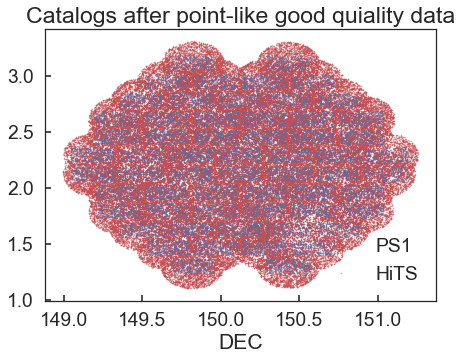

In [196]:
print 'sources in PS1 good quality', PS1_data_good_g.shape
print 'sources in HiTS good quality', HiTS_data_good_quality.shape
plt.figure(figsize=(7,5))
plt.title('Catalogs after point-like good quiality data')
plt.plot(PS1_coord.ra.value, PS1_coord.dec.value, 'r.', markersize=3, label='PS1', alpha=.5)
plt.plot(HiTS_coord.ra.value, HiTS_coord.dec.value, 'b.', markersize=3, label='HiTS', alpha=.5)
plt.legend(loc='best')
plt.xlabel('RA')
plt.xlabel('DEC')
plt.show()

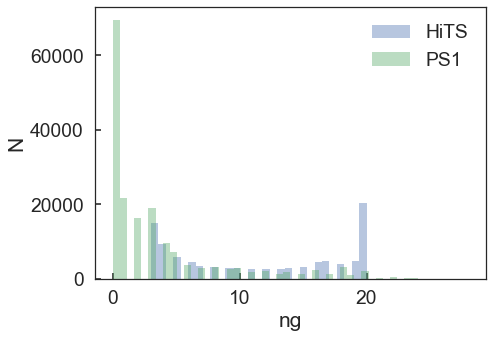

In [197]:
plt.figure(figsize=(7,5))
sb.distplot(HiTS_data.gN, kde=False, label='HiTS')
sb.distplot(PS1_data_good_g.ng, kde=False, label='PS1')
plt.legend()
plt.xlabel('ng')
plt.ylabel('N')
plt.show()

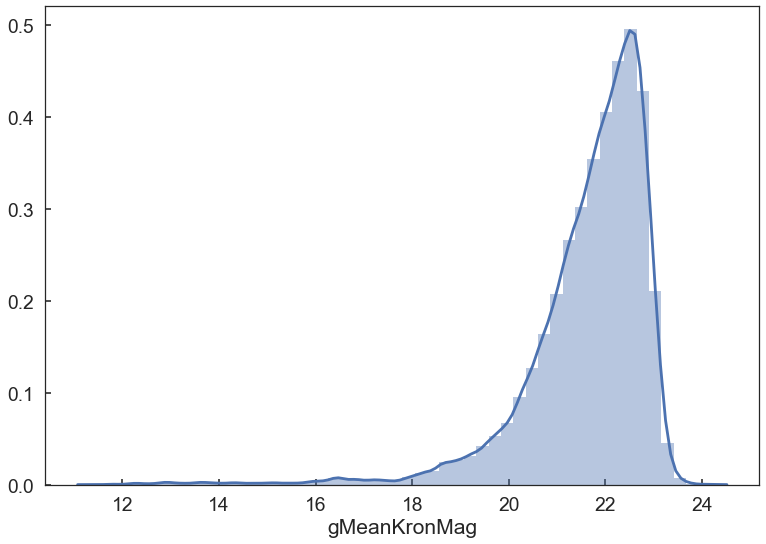

In [198]:
sb.distplot(PS1_data_good_g.query('gMeanKronMag > 0').gMeanKronMag)
plt.show()

### Matching Catalogs

In [199]:
idx, d2d, d3d = HiTS_coord.match_to_catalog_3d(PS1_coord)
mask_less2 = (d2d.arcsec < 1.5)
print 'Number of matches wihitn 2 arcsec:', len(idx[mask_less2])

Number of matches wihitn 2 arcsec: 12753


In [200]:
match_PS1 = PS1_data_good_g.iloc[idx[mask_less2]]
match_HiTS = HiTS_data_good_quality.iloc[mask_less2]

In [201]:
match_PS1.reset_index(inplace=True)
match_HiTS.reset_index(inplace=True)
match_HiTS.drop('index', axis=1, inplace=True)

/Users/jorgetil/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [202]:
match_HiTS.head()

,Unnamed: 0,internalID,ID,X,Y,raMedian,decMedian,raMedianStd,decMedianStd,gN,...,gAp4FluxStd,gMedianAp4Mag,gMedianAp4MagStd,gMedianAp4MagErr,gAp5Flux,gAp5FluxErr,gAp5FluxStd,gMedianAp5Mag,gMedianAp5MagStd,gMedianAp5MagErr
0,81,Blind14A_04_N1_0086_3780,HiTS095715+021146,86.909475,3780.141138,149.313091,2.196283,0.000008,0.000012,17,...,180.455237,20.550277,0.028130,0.088229,10122.3200,1071.597396,236.189033,20.567012,0.037481,0.115165
1,84,Blind14A_04_N1_0096_2510,HiTS095652+021144,96.831815,2510.400773,149.220506,2.195559,0.000016,0.000015,17,...,180.765099,21.773049,0.081998,0.267317,3335.2680,1070.890618,236.433085,21.742432,0.115175,0.326815
2,85,Blind14A_04_N1_0096_3012,HiTS095701+021144,96.062692,3012.383885,149.257096,2.195605,0.000013,0.000011,17,...,180.787542,21.955977,0.082490,0.330680,2868.3600,1070.806695,236.450272,21.948450,0.098796,0.388946
3,98,Blind14A_04_N1_0108_3424,HiTS095708+021141,108.036708,3424.395436,149.287139,2.194729,0.000025,0.000021,17,...,180.842947,22.611170,0.210164,0.605932,1604.1170,1070.699839,236.482793,22.672953,0.253316,0.787189
4,121,Blind14A_04_N1_0160_2454,HiTS095651+021127,160.675332,2454.748464,149.216451,2.190894,0.000036,0.000032,16,...,146.526556,23.223371,0.241659,0.998042,842.1397,963.777002,195.589848,23.295798,0.331732,1.275554


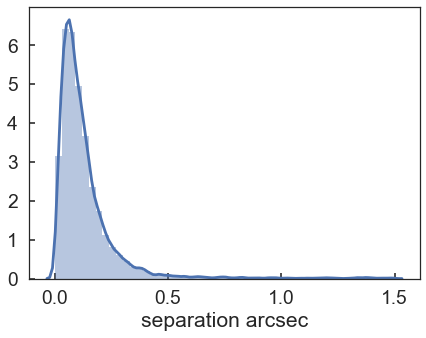

In [203]:
plt.figure(figsize=(7,5))
sb.distplot(d2d.arcsec[mask_less2], kde=True)
plt.legend(loc='best')
plt.xlabel(r'separation arcsec')
plt.show()

In [204]:
diff_g = match_PS1.gMeanKronMag.values -\
         match_HiTS.gMedianKronMag.values
mask_lim = (match_PS1.gMeanKronMag.values > 16) & (match_PS1.gMeanKronMag.values < 21) & \
            (match_HiTS.gMedianKronMag.values > 16) & (match_HiTS.gMedianKronMag.values < 21)
mask_diff = mask_difference(match_PS1.gMeanKronMag.values[mask_lim], 
                           match_HiTS.gMedianKronMag.values[mask_lim], n=3)
rms_g = rms(diff_g[mask_lim][mask_diff])
MAD_g = MAD(diff_g[mask_lim][mask_diff])

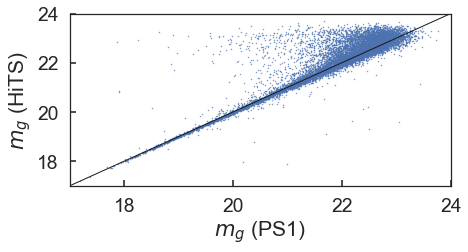

In [224]:
fig, ax = plt.subplots(1,1, figsize=(7,4), sharex=True)
for k,b in enumerate(['g']):
    
    diff_g = match_PS1['%sMeanKronMag' % b].values - match_HiTS['%sMedianKronMag' % b].values
    mask_lim = (match_PS1['%sMeanKronMag' % b].values > 16) & (match_PS1['%sMeanKronMag' % b].values < 21.5) & \
            (match_HiTS['%sMedianKronMag' % b].values > 16) & (match_HiTS['%sMedianKronMag' % b].values < 21.5)
    mask_diff = mask_difference(match_PS1['%sMeanKronMag' % b].values[mask_lim], 
                           match_HiTS['%sMedianKronMag' % b].values[mask_lim], n=3)
    rms_g = rms(diff_g[mask_lim][mask_diff])
    MAD_g = MAD(diff_g[mask_lim][mask_diff])
    
    ax.plot(match_PS1['%sMeanKronMag' % b].values,
            match_HiTS['%sMedianKronMag' % b].values,
             '.b', markersize=3, alpha=.7)
    ax.plot(range(10,30), range(10,30), '-k', linewidth=1)
    ax.set_xlabel(r'$m_{%s}$ (PS1)' % b)
    ax.set_ylabel(r'$m_{%s}$ (HiTS)' % b)
    ax.set_xlim(17,24.)
    ax.set_ylim(17,24.)
    #nbins = len(ax.get_xticklabels())
    #ax.yaxis.set_major_locator(MaxNLocator(nbins=nbins, prune='both'))
plt.tight_layout()
fig.subplots_adjust(hspace=0)
plt.savefig('%s/figures/HiTS_PS_%s_%s.pdf' % (mainpath, field, 'all'), 
            format='pdf', dpi=600,bbox_inches='tight')
plt.show()

In [221]:
print rms_g, MAD_g

0.0524983836587 0.0310571276012


In [ ]:
for b in ['g','r','i']:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    ax[0].plot(match_PS1['%sMeanKronMag' % (b)], 
             match_PS1['%sMeanKronMagStd' % (b)], 
             '*g', markersize=4, alpha=.4, label='PS')
    ax[0].plot(match_HiTS['%sMedianKronMag' % (b)], 
             match_HiTS['%sMedianKronMagStd' % (b)], 
             '.b', markersize=4, alpha=.4, label='HiTS')
    ax[0].set_xlabel('%s mag' % (b))
    ax[0].set_ylabel('%s std' % (b))
    ax[0].set_xlim(14,26)
    ax[0].set_ylim(0,1)
    ax[0].legend()
    ax[1].plot(match_PS1['%sMeanKronMag' % (b)], 
            match_PS1['%sMeanKronMagErr' % (b)], 
            '*g', markersize=4, alpha=.4, label='PS')
    ax[1].plot(match_HiTS['%sMedianKronMag' % (b)], 
            match_HiTS['%sMedianKronMagErr' % (b)], 
            '.b', markersize=4, alpha=.4, label='HiTS')
    ax[1].set_xlabel('%s mag' % (b))
    ax[1].set_ylabel('%s err' % (b))
    ax[1].set_xlim(14,26)
    ax[1].set_ylim(0,1)
    ax[1].legend()
    plt.show()

In [60]:
def customJoint(x,y,*args,**kwargs):
    plt.scatter(x,y,c='b', s=1.5, alpha=.5, edgecolors='face')
    plt.axhline(0, c='k', ls='--', lw=1)
    #nparam_density = stats.kde.gaussian_kde(y)
    #aux = np.linspace(-.5, .5, 100)
    #nparam_density = nparam_density(aux)
    #mode = aux[np.argmax(nparam_density)]
    #plt.axhline(mode, c='r', ls='--', lw=1)
def customMarginal(x,*args,**kwargs):
    sb.distplot(x, hist=False, kde=True,color='b', vertical=kwargs['vertical'])

In [ ]:
min_lim = [15,15,15]
for i,b in enumerate(['g','r','i']):
    mask_yes = ((match_PS1['%sMeanKronMag'%(b)] > min_lim[i]) & 
               (match_HiTS['%sMedianKronMag'%(b)] > min_lim[i]) & 
               (match_HiTS['%sN'%(b)] > 1)).values
    mask_diff = mask_difference(match_PS1['%sMeanKronMag'%(b)].values[mask_yes], 
                           match_HiTS['%sMedianKronMag'%(b)].values[mask_yes], n=3.5)
    
    diff_ = match_HiTS['%sMedianKronMag'%(b)] - match_PS1['%sMeanKronMag'%(b)]
    print diff_[mask_yes].shape
    print diff_[mask_yes][mask_diff].shape
    
    nparam_density = stats.kde.gaussian_kde(diff_[mask_yes][mask_diff].values)
    aux = np.linspace(-.5, .5, 200)
    nparam_density = nparam_density(aux)
    mode = aux[np.argmax(nparam_density)]
    print mode
    
    g = sb.JointGrid(match_PS1['%sMeanKronMag'%(b)][mask_yes][mask_diff],
                        diff_[mask_yes][mask_diff], space=0, size=6)
    g = g.plot(customJoint, customMarginal)
    plt.ylim(np.min(diff_[mask_yes][mask_diff]) ,
            np.max(diff_[mask_yes][mask_diff]))
    #dots = grid.plot_joint(plt.scatter, color="k", s=2, alpha=.5)
    #hist = grid.plot_marginals(sb.distplot, kde=False, color="k")
    plt.xlabel(r'$(PS1)_g$')
    plt.ylabel(r'$(HiTS - PS1)_g$')
    #plt.tight_layout()
    g.savefig('%s/figures/HiTS_PS1_%s_%s.pdf' % (mainpath, field, b), format='pdf', dpi=600,
                bbox_inches='tight')
    plt.show()